In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
import scipy.ndimage

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
model = tf.keras.models.load_model('TrashCNN.h5')

In [5]:
orientation_test = tf.keras.preprocessing.image.load_img(
    "C:/Users/seren/Downloads/Underwater_Trash/orientation_test.jpeg", 
    grayscale=False, color_mode='rgb', target_size=(160,160),
    interpolation='nearest')

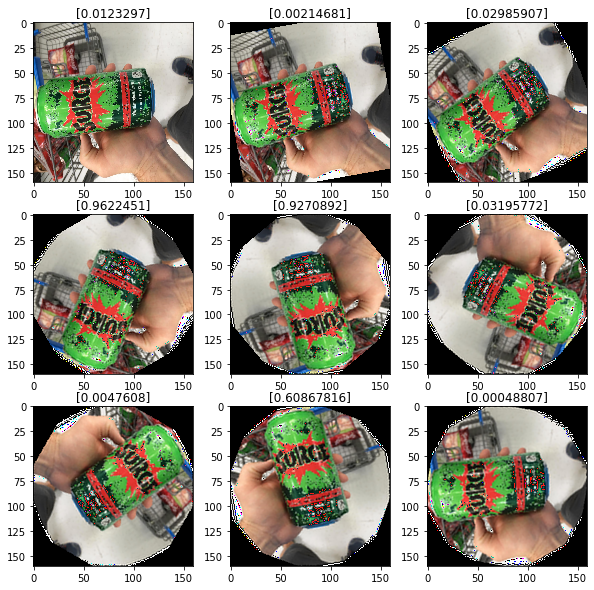

In [7]:
input_arr = tf.keras.preprocessing.image.img_to_array(orientation_test)  

plt.figure(figsize=(10, 10))
angle = 0
for i in range(9):
    input_arr = scipy.ndimage.rotate(input_arr,angle, reshape=False) 
    input_arr_batch = np.array([input_arr])
    predictions = model.predict(input_arr_batch)
    predictions = tf.nn.sigmoid(predictions)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(input_arr.astype("uint8"))
    plt.title(predictions.numpy()[0])
    angle = angle+10